<a href="https://colab.research.google.com/github/YonggunJung/Project1-KOSPI/blob/main/121_%EC%BD%94%EC%8A%A4%ED%94%BC_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EC%9B%94%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 기본 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

import re

import surprise

# 경고 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'Apple Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation

# CNN : 커널을 통해 합성곱을 구하는것, 이미지의 특정이 두드러지게 함
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling : 커널 내에서 가장 큰 값을 추출하는 방식으로 불필요 부분을 제거
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# Flatten : 다차원의 이미지 데이터를 선형 회귀 은닉층으로 전달 전에 1차원으로 변환
from tensorflow.keras.layers import Flatten
# Dropout : 이미지나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 함
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 횟수가 줄어듬
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고 오랫동안 학습이 가능케 함
from tensorflow.keras.layers import Dropout
# Embedding : 단어의 수 조정
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM


# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델 복원
from tensorflow.keras.models import load_model

# 모델 자동 저장
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단
from tensorflow.keras.callbacks import EarlyStopping

# 문장 자르기
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰줌
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만듦
from tensorflow.keras.preprocessing.text import text_to_word_sequence


# 평가 함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 -> 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검즘용으로 나누기
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from surprise import SVD, Dataset, Reader, accuracy
from surprise import model_selection


from konlpy.tag import Okt



# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 있는데 이때 시드를 고정 시킴
random_seed = 1

np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU메모리 사용을 필요한 만큼만 쓸수 있다록 함
# 컴퓨터에 있는 GPU정도들을 가져온다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면
if len(gpus) >0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [ ]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래서 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 용
# plt.rcParams['font.family'] = 'AppleGothic' # 맥 용
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 두개 이상 설정할 경우
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedGroupKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV


# 평가함수 - 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 평가함수 - 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀용
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한 모듈
import datetime

# 저장을 위한 모듈
import pickle


In [ ]:
# 코스피 전처리  불러오기
df1 = pd.read_csv('./data//make/코스피전처리.csv', encoding='utf-8-sig')
df1

,일자,오픈,종가,거래량
0,1981-05,121.766667,121.766667,1.447792e+06
1,1981-06,137.104000,137.104000,2.314800e+06
2,1981-07,154.842308,154.842308,1.578923e+06
3,1981-08,145.368000,145.368000,8.250400e+05
4,1981-09,141.528000,141.528000,7.726800e+05
...,...,...,...,...
491,2022-04,2703.242857,2700.210000,9.540277e+08
492,2022-05,2628.338571,2628.356190,8.030019e+08
493,2022-06,2474.948500,2487.598500,6.007340e+08
494,2022-07,2362.794762,2363.606190,3.788405e+08


In [ ]:
# 일자 컬럼 시계열 데이터로 변환
df1['일자'] = pd.to_datetime(df1['일자'], format = '%Y-%m')

In [ ]:
# 종가 컬럼명 코스피로 변환
df1.rename(columns = {'종가' : '코스피'}, inplace=True)
df1

,일자,오픈,코스피,거래량
0,1981-05-01,121.766667,121.766667,1.447792e+06
1,1981-06-01,137.104000,137.104000,2.314800e+06
2,1981-07-01,154.842308,154.842308,1.578923e+06
3,1981-08-01,145.368000,145.368000,8.250400e+05
4,1981-09-01,141.528000,141.528000,7.726800e+05
...,...,...,...,...
491,2022-04-01,2703.242857,2700.210000,9.540277e+08
492,2022-05-01,2628.338571,2628.356190,8.030019e+08
493,2022-06-01,2474.948500,2487.598500,6.007340e+08
494,2022-07-01,2362.794762,2363.606190,3.788405e+08


In [ ]:
# 불필요 컬럼 삭제
del df1['오픈'], df1['거래량']

In [ ]:
# 코스피200 전처리  불러오기
df2 = pd.read_csv('./data//make/코스피200전처리.csv', encoding='utf-8-sig')
df2

,일자,종가,시가,거래량,거래대금,상장시가총액
0,2001-06,74.019333,74.192667,192455.533333,1313.600000,1.864585e+05
1,2001-07,68.338571,68.494286,178518.142857,897.476190,1.735380e+05
2,2001-08,70.088182,69.875909,284889.500000,1125.772727,1.777835e+05
3,2001-09,62.220500,62.240000,416194.900000,1144.400000,1.571637e+05
4,2001-10,64.463500,64.338500,359815.100000,1098.250000,1.625868e+05
...,...,...,...,...,...,...
251,2022-05,347.516190,347.494762,206781.857143,6410.285714,1.786863e+06
252,2022-06,325.868500,327.490000,152451.900000,6653.950000,1.697973e+06
253,2022-07,312.161429,312.319048,115223.619048,5542.904762,1.626708e+06
254,2022-08,324.845455,324.590909,132443.136364,5850.909091,1.707250e+06


In [ ]:
# 일자 컬럼 시계열 데이터로 변환
df2['일자'] = pd.to_datetime(df2['일자'], format = '%Y-%m')

In [ ]:
# 종가 컬럼명 코스피200으로 변환
df2.rename(columns = {'종가' : '코스피200'}, inplace=True)
df2

,일자,코스피200,시가,거래량,거래대금,상장시가총액
0,2001-06-01,74.019333,74.192667,192455.533333,1313.600000,1.864585e+05
1,2001-07-01,68.338571,68.494286,178518.142857,897.476190,1.735380e+05
2,2001-08-01,70.088182,69.875909,284889.500000,1125.772727,1.777835e+05
3,2001-09-01,62.220500,62.240000,416194.900000,1144.400000,1.571637e+05
4,2001-10-01,64.463500,64.338500,359815.100000,1098.250000,1.625868e+05
...,...,...,...,...,...,...
251,2022-05-01,347.516190,347.494762,206781.857143,6410.285714,1.786863e+06
252,2022-06-01,325.868500,327.490000,152451.900000,6653.950000,1.697973e+06
253,2022-07-01,312.161429,312.319048,115223.619048,5542.904762,1.626708e+06
254,2022-08-01,324.845455,324.590909,132443.136364,5850.909091,1.707250e+06


In [ ]:
# 불 필요 컬럼 삭제
del df2['시가'], df2['거래량'], df2['거래대금'], df2['상장시가총액']

In [ ]:
# S&P500 데이터 불러오기
df3 = pd.read_csv('./data//make/S&P500전처리.csv', encoding='utf-8-sig')
df3

,일자,종가,오픈,변동 %
0,1980-01,114.16,107.94,5.76
1,1980-02,113.66,114.16,-0.44
2,1980-03,102.09,113.66,-10.18
3,1980-04,106.29,102.09,4.11
4,1980-05,111.24,106.29,4.66
...,...,...,...,...
508,2022-05,4132.15,4132.70,0.01
509,2022-06,3785.38,4156.10,-8.39
510,2022-07,4130.29,3779.27,9.11
511,2022-08,3955.00,4103.38,-4.24


In [ ]:
df3['일자'] = pd.to_datetime(df3['일자'], format = '%Y-%m')

In [ ]:
df3.rename(columns = {'종가' : 'S&P500'}, inplace=True)
df3

,일자,S&P500,오픈,변동 %
0,1980-01-01,114.16,107.94,5.76
1,1980-02-01,113.66,114.16,-0.44
2,1980-03-01,102.09,113.66,-10.18
3,1980-04-01,106.29,102.09,4.11
4,1980-05-01,111.24,106.29,4.66
...,...,...,...,...
508,2022-05-01,4132.15,4132.70,0.01
509,2022-06-01,3785.38,4156.10,-8.39
510,2022-07-01,4130.29,3779.27,9.11
511,2022-08-01,3955.00,4103.38,-4.24


In [ ]:
del df3['오픈'], df3['변동 %']

In [ ]:
df4 = pd.read_csv('./data/make/금전처리.csv', encoding='utf-8-sig')
df4

,Unnamed: 0,금값
0,1986/01,350.5
1,1986/02,338.15
2,1986/03,344.0
3,1986/04,345.75
4,1986/05,343.2
...,...,...
435,2022/04,"1,896.920"
436,2022/05,"1,837.360"
437,2022/06,"1,807.270"
438,2022/07,"1,765.940"


In [ ]:
# 금값 컬럼값 불필요 문자 삭제 및 데이터 타입 유리수로 변환
df4['금값'] = df4['금값'].str.replace(',', '').astype('float64')
df4

,Unnamed: 0,금값
0,1986/01,350.50
1,1986/02,338.15
2,1986/03,344.00
3,1986/04,345.75
4,1986/05,343.20
...,...,...
435,2022/04,1896.92
436,2022/05,1837.36
437,2022/06,1807.27
438,2022/07,1765.94


In [ ]:
df4.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df4

,일자,금값
0,1986/01,350.50
1,1986/02,338.15
2,1986/03,344.00
3,1986/04,345.75
4,1986/05,343.20
...,...,...
435,2022/04,1896.92
436,2022/05,1837.36
437,2022/06,1807.27
438,2022/07,1765.94


In [ ]:
df4['일자'] = pd.to_datetime(df4['일자'], format = '%Y-%m')

In [ ]:
df5 = pd.read_csv('./data/make/나스닥전처리.csv', encoding='utf-8-sig')
df5

,일자,오픈,종가,거래량
0,1984-12,246.199997,247.100006,8.012000e+07
1,1985-01,260.054546,260.845456,8.100273e+07
2,1985-02,285.236842,285.521052,9.172895e+07
3,1985-03,280.576188,280.428574,7.672905e+07
4,1985-04,280.947620,280.895238,7.173571e+07
...,...,...,...,...
449,2022-05,11827.222470,11829.729539,5.283224e+09
450,2022-06,11439.348447,11418.919085,5.397364e+09
451,2022-07,11554.086084,11622.631543,4.680970e+09
452,2022-08,12584.320822,12570.260403,4.761787e+09


In [ ]:
df5['일자'] = pd.to_datetime(df5['일자'], format = '%Y-%m')

In [ ]:
df5.rename(columns = {'종가' : '나스닥'}, inplace=True)
df5

,일자,오픈,나스닥,거래량
0,1984-12-01,246.199997,247.100006,8.012000e+07
1,1985-01-01,260.054546,260.845456,8.100273e+07
2,1985-02-01,285.236842,285.521052,9.172895e+07
3,1985-03-01,280.576188,280.428574,7.672905e+07
4,1985-04-01,280.947620,280.895238,7.173571e+07
...,...,...,...,...
449,2022-05-01,11827.222470,11829.729539,5.283224e+09
450,2022-06-01,11439.348447,11418.919085,5.397364e+09
451,2022-07-01,11554.086084,11622.631543,4.680970e+09
452,2022-08-01,12584.320822,12570.260403,4.761787e+09


In [ ]:
del df5['오픈'], df5['거래량']

In [ ]:
df6 = pd.read_csv('./data/make/넷플릭스전처리.csv', encoding='utf-8-sig')
df6

,일자,오픈,종가,거래량
0,2002-05,1.155833,1.135834,2.464677e+07
1,2002-06,1.050214,1.038071,3.709510e+06
2,2002-07,1.119578,1.110000,3.345936e+06
3,2002-08,0.874805,0.870974,2.949227e+06
4,2002-09,0.843179,0.828071,2.787470e+06
...,...,...,...,...
240,2022-05,185.863333,186.449524,1.198170e+07
241,2022-06,184.890953,184.847620,9.169176e+06
242,2022-07,196.233501,199.089000,1.350418e+07
243,2022-08,232.726522,233.026522,6.619926e+06


In [ ]:
df6['일자'] = pd.to_datetime(df6['일자'], format = '%Y-%m')

In [ ]:
df6.rename(columns = {'종가' : '넷플릭스'}, inplace=True)
df6

,일자,오픈,넷플릭스,거래량
0,2002-05-01,1.155833,1.135834,2.464677e+07
1,2002-06-01,1.050214,1.038071,3.709510e+06
2,2002-07-01,1.119578,1.110000,3.345936e+06
3,2002-08-01,0.874805,0.870974,2.949227e+06
4,2002-09-01,0.843179,0.828071,2.787470e+06
...,...,...,...,...
240,2022-05-01,185.863333,186.449524,1.198170e+07
241,2022-06-01,184.890953,184.847620,9.169176e+06
242,2022-07-01,196.233501,199.089000,1.350418e+07
243,2022-08-01,232.726522,233.026522,6.619926e+06


In [ ]:
del df6['오픈'], df6['거래량']

In [ ]:
df7 = pd.read_csv('./data/make/물가지수전처리.csv', encoding='utf-8-sig')
df7

,Unnamed: 0,물가지수
0,1981/01,45.75
1,1981/02,46.10
2,1981/03,46.55
3,1981/04,47.73
4,1981/05,49.10
...,...,...
494,2022/03,116.70
495,2022/04,118.59
496,2022/05,119.43
497,2022/06,120.10


In [ ]:
df7.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df7

,일자,물가지수
0,1981/01,45.75
1,1981/02,46.10
2,1981/03,46.55
3,1981/04,47.73
4,1981/05,49.10
...,...,...
494,2022/03,116.70
495,2022/04,118.59
496,2022/05,119.43
497,2022/06,120.10


In [ ]:
df7['일자'] = pd.to_datetime(df7['일자'], format = '%Y-%m')

In [ ]:
df8 = pd.read_csv('./data/make/상해종합전처리.csv', encoding='utf-8-sig')
df8

,일자,오픈,종가,거래량
0,1997-07,1171.738293,1167.582060,0.000000e+00
1,1997-08,1174.673851,1175.668044,0.000000e+00
2,1997-09,1186.661688,1179.479226,0.000000e+00
3,1997-10,1155.099542,1157.071100,0.000000e+00
4,1997-11,1172.668695,1170.993811,0.000000e+00
...,...,...,...,...
298,2022-05,3078.696842,3090.437898,3.551263e+05
299,2022-06,3279.799049,3295.388079,4.161667e+05
300,2022-07,3310.938093,3305.033331,3.276571e+05
301,2022-08,3242.867835,3243.599981,3.065174e+05


In [ ]:
df8.rename(columns = {'종가' : '상해종합'}, inplace=True)
df8

,일자,오픈,상해종합,거래량
0,1997-07,1171.738293,1167.582060,0.000000e+00
1,1997-08,1174.673851,1175.668044,0.000000e+00
2,1997-09,1186.661688,1179.479226,0.000000e+00
3,1997-10,1155.099542,1157.071100,0.000000e+00
4,1997-11,1172.668695,1170.993811,0.000000e+00
...,...,...,...,...
298,2022-05,3078.696842,3090.437898,3.551263e+05
299,2022-06,3279.799049,3295.388079,4.161667e+05
300,2022-07,3310.938093,3305.033331,3.276571e+05
301,2022-08,3242.867835,3243.599981,3.065174e+05


In [ ]:
df8['일자'] = pd.to_datetime(df8['일자'], format = '%Y-%m')

In [ ]:
del df8['오픈'], df8['거래량']

In [ ]:
df9 = pd.read_csv('./data/make/주택매매가격전처리.csv', encoding='utf-8-sig')
df9

,Unnamed: 0,주택매매가격지수
0,1986/01,27.682
1,1986/02,27.682
2,1986/03,27.724
3,1986/04,27.516
4,1986/05,27.392
...,...,...
435,2022/04,100.517
436,2022/05,100.768
437,2022/06,100.869
438,2022/07,100.869


In [ ]:
df9.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df9

,일자,주택매매가격지수
0,1986/01,27.682
1,1986/02,27.682
2,1986/03,27.724
3,1986/04,27.516
4,1986/05,27.392
...,...,...
435,2022/04,100.517
436,2022/05,100.768
437,2022/06,100.869
438,2022/07,100.869


In [ ]:
df9['일자'] = pd.to_datetime(df9['일자'], format = '%Y-%m')

In [ ]:
# 단위 : 백만원
df10 = pd.read_csv('./data/make/지역유형별 신용카드 전처리.csv', encoding='utf-8-sig')
df10

,Unnamed: 0,합계,종합소매,백화점,대형마트/유통전문점,슈퍼마켓,편의점,면세점,전자상거래/통신판매,식료품,...,오락/문화,스포츠/오락/여가,서적/문구,교육,숙박/음식,숙박,음식점,공과금/개인 및 전문 서비스,금융/보험,기타
0,2009-12-01,24338638,4412154,1293161,2191093,692467,74793,160640,2089447,442686,...,1121633,829293,292339,832627,2922757,234682,2688075,1216408,870635,1694977
1,2010-01-01,21112945,3896648,1046319,1970279,666373,70993,142685,1898278,395329,...,931703,681654,250049,773783,2523163,204685,2318478,1272172,775214,1422975
2,2010-02-01,20392319,3894444,910952,2098611,677879,80519,126482,1767115,482663,...,854670,620232,234438,782854,2258609,165533,2093076,1172247,742836,1414682
3,2010-03-01,23524772,4263787,1114037,2205886,707834,79535,156494,2044895,413017,...,1181319,819449,361870,911390,2759929,184830,2575099,1209601,922914,1598574
4,2010-04-01,22218264,3957763,1045405,1984126,701029,77647,149556,1870235,410024,...,1071482,821502,249980,767278,2722885,223252,2499633,1250836,791823,1559754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2022-01-01,54539492,7634707,1604401,3165932,1942293,873099,48982,13162164,1285590,...,1133765,851242,282523,1110997,4435454,262421,4173034,7204997,2243569,3968446
146,2022-02-01,47029608,6265129,1286777,2575148,1565735,792786,44683,11902937,798669,...,1020406,784177,236228,1019333,3690207,243682,3446524,5478483,2130398,3597376
147,2022-03-01,53934645,7178711,1493279,2868236,1811634,956231,49332,13475197,889680,...,1427681,1096302,331379,1128420,4409997,222313,4187684,5924848,2514571,4084527
148,2022-04-01,55138961,7279162,1627246,2873688,1773061,941861,63306,13032409,947790,...,1596543,1329752,266791,1031190,5259467,248080,5011387,5976065,2339679,4197811


In [ ]:
# 필요 컬럼만 들고 오기
df11 = df10.iloc[:, :2]
df11

,Unnamed: 0,합계
0,2009-12-01,24338638
1,2010-01-01,21112945
2,2010-02-01,20392319
3,2010-03-01,23524772
4,2010-04-01,22218264
...,...,...
145,2022-01-01,54539492
146,2022-02-01,47029608
147,2022-03-01,53934645
148,2022-04-01,55138961


In [ ]:
df11.rename(columns = {'Unnamed: 0' : '일자', '합계' : '신용카드소비(백만원)'}, inplace=True)
df11

,일자,신용카드소비(백만원)
0,2009-12-01,24338638
1,2010-01-01,21112945
2,2010-02-01,20392319
3,2010-03-01,23524772
4,2010-04-01,22218264
...,...,...
145,2022-01-01,54539492
146,2022-02-01,47029608
147,2022-03-01,53934645
148,2022-04-01,55138961


In [ ]:
df11['일자'] = pd.to_datetime(df11['일자'], format = '%Y-%m')

In [ ]:
df12 = pd.read_csv('./data/make/통화량전처리.csv', encoding='utf-8-sig')
df12

,Unnamed: 0,통화량(십억원)
0,1986/01,"43,133.6"
1,1986/02,"43,492.4"
2,1986/03,"44,587.1"
3,1986/04,"45,188.7"
4,1986/05,"46,197.5"
...,...,...
433,2022/02,"3,656,135.8"
434,2022/03,"3,672,133.4"
435,2022/04,"3,675,828.7"
436,2022/05,"3,694,489.3"


In [ ]:
df12.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df12

,일자,통화량(십억원)
0,1986/01,"43,133.6"
1,1986/02,"43,492.4"
2,1986/03,"44,587.1"
3,1986/04,"45,188.7"
4,1986/05,"46,197.5"
...,...,...
433,2022/02,"3,656,135.8"
434,2022/03,"3,672,133.4"
435,2022/04,"3,675,828.7"
436,2022/05,"3,694,489.3"


In [ ]:
df12['일자'] = pd.to_datetime(df12['일자'], format = '%Y-%m')

In [ ]:
# 통화량(십억원) 컬럼 불필요 문자 삭제 및 데이터 타입 유리수로 변환
df12['통화량(십억원)'] = df12['통화량(십억원)'].str.replace(',', '').astype('float64')

In [ ]:
# 금리 데이터 불러오기
df112 = pd.read_csv('./data/make/금리전처리.csv', encoding='utf-8-sig')
df112

,Unnamed: 0,1981/01,1981/02,1981/03,1981/04,1981/05,1981/06,1981/07,1981/08,1981/09,...,2021/11,2021/12,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06,2022/07,2022/08
0,무담보콜금리 전체,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.800,1.024,1.181,1.211,1.250,1.297,1.504,1.751,1.953,2.262
1,담보콜금리전체,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,CD(91일),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.170,1.270,1.390,1.500,1.500,1.640,1.770,1.990,2.410,2.790
3,국고채(3년),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.953,1.800,2.060,2.285,2.369,2.941,3.019,3.477,3.238,3.247
4,"회사채(3년, AA-)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.492,2.410,2.632,2.873,3.028,3.631,3.775,4.233,4.126,4.227


In [ ]:
# Unnamed: 0 컬럼을 인덱스로 변환
df112.rename(index = df112['Unnamed: 0'], inplace=True)
df112

,Unnamed: 0,1981/01,1981/02,1981/03,1981/04,1981/05,1981/06,1981/07,1981/08,1981/09,...,2021/11,2021/12,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06,2022/07,2022/08
무담보콜금리 전체,무담보콜금리 전체,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.800,1.024,1.181,1.211,1.250,1.297,1.504,1.751,1.953,2.262
담보콜금리전체,담보콜금리전체,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CD(91일),CD(91일),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.170,1.270,1.390,1.500,1.500,1.640,1.770,1.990,2.410,2.790
국고채(3년),국고채(3년),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.953,1.800,2.060,2.285,2.369,2.941,3.019,3.477,3.238,3.247
"회사채(3년, AA-)","회사채(3년, AA-)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.492,2.410,2.632,2.873,3.028,3.631,3.775,4.233,4.126,4.227


In [ ]:
# 불필요 데이터 삭제
df112.drop(df112.iloc[1:1, :73], axis=1, inplace=True)
df112

,1987/01,1987/02,1987/03,1987/04,1987/05,1987/06,1987/07,1987/08,1987/09,1987/10,...,2021/11,2021/12,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06,2022/07,2022/08
무담보콜금리 전체,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.800,1.024,1.181,1.211,1.250,1.297,1.504,1.751,1.953,2.262
담보콜금리전체,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CD(91일),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.170,1.270,1.390,1.500,1.500,1.640,1.770,1.990,2.410,2.790
국고채(3년),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.953,1.800,2.060,2.285,2.369,2.941,3.019,3.477,3.238,3.247
"회사채(3년, AA-)",12.65,12.65,12.65,12.65,12.65,12.57,12.57,12.58,12.58,12.58,...,2.492,2.410,2.632,2.873,3.028,3.631,3.775,4.233,4.126,4.227


In [ ]:
# 행과 열 변환
df112 = df112.T
df112.head()

,무담보콜금리 전체,담보콜금리전체,CD(91일),국고채(3년),"회사채(3년, AA-)"
1987/01,0.0,0.0,0.0,0.0,12.65
1987/02,0.0,0.0,0.0,0.0,12.65
1987/03,0.0,0.0,0.0,0.0,12.65
1987/04,0.0,0.0,0.0,0.0,12.65
1987/05,0.0,0.0,0.0,0.0,12.65


In [ ]:
# 새로운 인덱스 추가
df112.reset_index(inplace=True)
df112.head()

,index,무담보콜금리 전체,담보콜금리전체,CD(91일),국고채(3년),"회사채(3년, AA-)"
0,1987/01,0.0,0.0,0.0,0.0,12.65
1,1987/02,0.0,0.0,0.0,0.0,12.65
2,1987/03,0.0,0.0,0.0,0.0,12.65
3,1987/04,0.0,0.0,0.0,0.0,12.65
4,1987/05,0.0,0.0,0.0,0.0,12.65


In [ ]:
# 인덱스 컬럼명 일자로 변환
df112.rename(columns = {'index' : '일자'}, inplace=True)
df112

,일자,무담보콜금리 전체,담보콜금리전체,CD(91일),국고채(3년),"회사채(3년, AA-)"
0,1987/01,0.000,0.0,0.00,0.000,12.650
1,1987/02,0.000,0.0,0.00,0.000,12.650
2,1987/03,0.000,0.0,0.00,0.000,12.650
3,1987/04,0.000,0.0,0.00,0.000,12.650
4,1987/05,0.000,0.0,0.00,0.000,12.650
...,...,...,...,...,...,...
423,2022/04,1.297,0.0,1.64,2.941,3.631
424,2022/05,1.504,0.0,1.77,3.019,3.775
425,2022/06,1.751,0.0,1.99,3.477,4.233
426,2022/07,1.953,0.0,2.41,3.238,4.126


In [ ]:
# 일자 컬럼 시계열 데이터로 변환
df112['일자'] = pd.to_datetime(df112['일자'], format = '%Y-%m')

In [ ]:
df13 = df112

In [ ]:
df113 = pd.read_csv('./data/make/니케이전처리.csv', encoding='utf-8-sig')
df113

,일자,오픈,종가,거래량
0,1985-01,11811.935938,11811.935938,0.000000e+00
1,1985-02,12079.000977,12079.000977,0.000000e+00
2,1985-03,12464.758936,12464.758936,0.000000e+00
3,1985-04,12433.738979,12433.738979,0.000000e+00
4,1985-05,12567.161412,12567.161412,0.000000e+00
...,...,...,...,...
448,2022-05,26640.530016,26653.769531,8.331053e+07
449,2022-06,26977.705788,26958.392223,7.444091e+07
450,2022-07,26980.006543,26986.739648,6.696500e+07
451,2022-08,28320.191406,28351.666903,6.353636e+07


In [ ]:
df113.rename(columns = {'종가' : '니케이'}, inplace=True)
df113

,일자,오픈,니케이,거래량
0,1985-01,11811.935938,11811.935938,0.000000e+00
1,1985-02,12079.000977,12079.000977,0.000000e+00
2,1985-03,12464.758936,12464.758936,0.000000e+00
3,1985-04,12433.738979,12433.738979,0.000000e+00
4,1985-05,12567.161412,12567.161412,0.000000e+00
...,...,...,...,...
448,2022-05,26640.530016,26653.769531,8.331053e+07
449,2022-06,26977.705788,26958.392223,7.444091e+07
450,2022-07,26980.006543,26986.739648,6.696500e+07
451,2022-08,28320.191406,28351.666903,6.353636e+07


In [ ]:
df113['일자'] = pd.to_datetime(df113['일자'], format='%Y-%m')

In [ ]:
del df113['오픈'], df113['거래량']

In [ ]:
df14 = df113

In [ ]:
df114 = pd.read_csv('./data/make/실업률전처리.csv', encoding='utf-8-sig')
df114

,Unnamed: 0,실업률
0,1999/06,6.7
1,1999/07,6.7
2,1999/08,6.2
3,1999/09,5.2
4,1999/10,5.0
...,...,...
273,2022/03,3.0
274,2022/04,3.0
275,2022/05,3.0
276,2022/06,3.0


In [ ]:
df114.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df114

,일자,실업률
0,1999/06,6.7
1,1999/07,6.7
2,1999/08,6.2
3,1999/09,5.2
4,1999/10,5.0
...,...,...
273,2022/03,3.0
274,2022/04,3.0
275,2022/05,3.0
276,2022/06,3.0


In [ ]:
df114['일자'] = pd.to_datetime(df114['일자'], format = '%Y-%m')

In [ ]:
df15 = df114

In [ ]:
df115 = pd.read_csv('./data/make/정부최종소비지출1 전처리.csv', encoding='utf-8-sig')
df115

,Unnamed: 0,일반정부지출,중앙정부지출,지방정부지출,사회보장기금지출
0,1996,50998.6,19601.0,25516.0,5881.6
1,1997,55339.9,20968.3,27612.6,6759.0
2,1998,61258.7,23253.4,29898.1,8107.1
3,1999,65511.9,24542.0,31645.7,9324.1
4,2000,71028.2,25917.7,34448.8,10661.6
5,2001,83110.7,29315.1,38940.2,14855.3
6,2002,92141.5,33033.9,43429.7,15677.9
7,2003,101757.0,36141.1,48670.4,16945.5
8,2004,112531.3,39606.1,54271.7,18653.5
9,2005,123149.4,43244.3,59371.2,20533.9


In [ ]:
df115.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df115

,일자,일반정부지출,중앙정부지출,지방정부지출,사회보장기금지출
0,1996,50998.6,19601.0,25516.0,5881.6
1,1997,55339.9,20968.3,27612.6,6759.0
2,1998,61258.7,23253.4,29898.1,8107.1
3,1999,65511.9,24542.0,31645.7,9324.1
4,2000,71028.2,25917.7,34448.8,10661.6
5,2001,83110.7,29315.1,38940.2,14855.3
6,2002,92141.5,33033.9,43429.7,15677.9
7,2003,101757.0,36141.1,48670.4,16945.5
8,2004,112531.3,39606.1,54271.7,18653.5
9,2005,123149.4,43244.3,59371.2,20533.9


In [ ]:
df115['일자'] = pd.to_datetime(df115['일자'], format = '%Y')

In [ ]:
df16 = df115

In [ ]:
df119 = pd.read_csv('./data/make/주요국환율전처리.csv', encoding='utf-8-sig')
df119

,Unnamed: 0,미국달러환율,중국위안환율,일본100엔환율,유로
0,1981/01,662.22,0.00,327.0,0
1,1981/02,667.74,0.00,324.46,0
2,1981/03,671.56,0.00,321.78,0
3,1981/04,676.48,0.00,314.58,0
4,1981/05,682.14,0.00,309.34,0
...,...,...,...,...,...
495,2022/04,"1,232.34",191.82,977.38,"1,334.08"
496,2022/05,"1,269.88",188.78,985.49,"1,342.43"
497,2022/06,"1,277.35",190.68,951.34,"1,348.96"
498,2022/07,"1,307.40",194.13,955.93,"1,332.91"


In [ ]:
df119.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df119

,일자,미국달러환율,중국위안환율,일본100엔환율,유로
0,1981/01,662.22,0.00,327.0,0
1,1981/02,667.74,0.00,324.46,0
2,1981/03,671.56,0.00,321.78,0
3,1981/04,676.48,0.00,314.58,0
4,1981/05,682.14,0.00,309.34,0
...,...,...,...,...,...
495,2022/04,"1,232.34",191.82,977.38,"1,334.08"
496,2022/05,"1,269.88",188.78,985.49,"1,342.43"
497,2022/06,"1,277.35",190.68,951.34,"1,348.96"
498,2022/07,"1,307.40",194.13,955.93,"1,332.91"


In [ ]:
df119['미국달러환율'] = df119['미국달러환율'].str.replace(',', '').astype('float64')
df119['일본100엔환율'] = df119['일본100엔환율'].str.replace(',', '').astype('float64')
df119['유로'] = df119['유로'].str.replace(',', '').astype('float64')
df119

,일자,미국달러환율,중국위안환율,일본100엔환율,유로
0,1981/01,662.22,0.00,327.00,0.00
1,1981/02,667.74,0.00,324.46,0.00
2,1981/03,671.56,0.00,321.78,0.00
3,1981/04,676.48,0.00,314.58,0.00
4,1981/05,682.14,0.00,309.34,0.00
...,...,...,...,...,...
495,2022/04,1232.34,191.82,977.38,1334.08
496,2022/05,1269.88,188.78,985.49,1342.43
497,2022/06,1277.35,190.68,951.34,1348.96
498,2022/07,1307.40,194.13,955.93,1332.91


In [ ]:
df119['일자'] = pd.to_datetime(df119['일자'], format = '%Y-%m')
df119

,일자,미국달러환율,중국위안환율,일본100엔환율,유로
0,1981-01-01,662.22,0.00,327.00,0.00
1,1981-02-01,667.74,0.00,324.46,0.00
2,1981-03-01,671.56,0.00,321.78,0.00
3,1981-04-01,676.48,0.00,314.58,0.00
4,1981-05-01,682.14,0.00,309.34,0.00
...,...,...,...,...,...
495,2022-04-01,1232.34,191.82,977.38,1334.08
496,2022-05-01,1269.88,188.78,985.49,1342.43
497,2022-06-01,1277.35,190.68,951.34,1348.96
498,2022-07-01,1307.40,194.13,955.93,1332.91


In [ ]:

df17 = df119

In [ ]:
df120 = pd.read_csv('./data//make/WTI유가전처리.csv')
df120

,Unnamed: 0,날짜,종가
0,0,2022-09-01,87.37
1,1,2022-08-01,89.55
2,2,2022-07-01,98.62
3,3,2022-06-01,106.22
4,4,2022-05-01,114.67
...,...,...,...
469,469,1983-08-01,31.59
470,470,1983-07-01,32.00
471,471,1983-06-01,31.38
472,472,1983-05-01,30.25


In [ ]:
df120.rename(columns = {'날짜' : '일자', '종가' : 'WTI유가전처리'}, inplace=True)
df120['일자'] = pd.to_datetime(df120['일자'], format='%Y-%m')

In [ ]:
del df120['Unnamed: 0']

In [ ]:
df18 = df120

In [ ]:
df121 = pd.read_csv('./data//make/필라델피아반도체전처리.csv')
df121

,Unnamed: 0,날짜,종가
0,0,2022-09-01,"2,562.3"
1,1,2022-08-01,"2,677.4"
2,2,2022-07-01,"2,967.1"
3,3,2022-06-01,"2,556.3"
4,4,2022-05-01,"3,098.7"
...,...,...,...
335,335,1994-10-01,141.8
336,336,1994-09-01,128.8
337,337,1994-08-01,134.9
338,338,1994-07-01,122.4


In [ ]:
df121.rename(columns = {'종가' : '필라델피아반도체', '날짜': '일자'}, inplace=True)
df121['일자'] = pd.to_datetime(df121['일자'], format='%Y-%m')
df121

,Unnamed: 0,일자,필라델피아반도체
0,0,2022-09-01,"2,562.3"
1,1,2022-08-01,"2,677.4"
2,2,2022-07-01,"2,967.1"
3,3,2022-06-01,"2,556.3"
4,4,2022-05-01,"3,098.7"
...,...,...,...
335,335,1994-10-01,141.8
336,336,1994-09-01,128.8
337,337,1994-08-01,134.9
338,338,1994-07-01,122.4


In [ ]:
del df121['Unnamed: 0']

In [ ]:
df121['필라델피아반도체'] = df121['필라델피아반도체'].str.replace(',','').astype('float64')

In [ ]:
df121['일자'] = pd.to_datetime(df121['일자'], format = '%Y-%m')

In [ ]:
df19 = df121

- df10, df16 빼고 다 머지로 병합 'inner' ['일자']로 병합

In [ ]:
df20 = pd.merge(df1, df2, how='inner', on='일자')
df20

,일자,코스피,코스피200
0,2001-06-01,603.822500,74.019333
1,2001-07-01,555.511429,68.338571
2,2001-08-01,566.020909,70.088182
3,2001-09-01,504.379000,62.220500
4,2001-10-01,522.308500,64.463500
...,...,...,...
250,2022-04-01,2700.210000,356.095238
251,2022-05-01,2628.356190,347.516190
252,2022-06-01,2487.598500,325.868500
253,2022-07-01,2363.606190,312.161429


In [ ]:
df21 = pd.merge(df20, df3, how='inner', on='일자')
df21

,일자,코스피,코스피200,S&P500
0,2001-06-01,603.822500,74.019333,1224.38
1,2001-07-01,555.511429,68.338571,1211.23
2,2001-08-01,566.020909,70.088182,1133.58
3,2001-09-01,504.379000,62.220500,1040.94
4,2001-10-01,522.308500,64.463500,1059.78
...,...,...,...,...
250,2022-04-01,2700.210000,356.095238,4131.93
251,2022-05-01,2628.356190,347.516190,4132.15
252,2022-06-01,2487.598500,325.868500,3785.38
253,2022-07-01,2363.606190,312.161429,4130.29


In [ ]:
df22 = pd.merge(df21, df4, how='inner', on='일자')
df22

,일자,코스피,코스피200,S&P500,금값
0,2001-06-01,603.822500,74.019333,1224.38,270.85
1,2001-07-01,555.511429,68.338571,1211.23,266.65
2,2001-08-01,566.020909,70.088182,1133.58,274.40
3,2001-09-01,504.379000,62.220500,1040.94,293.25
4,2001-10-01,522.308500,64.463500,1059.78,279.65
...,...,...,...,...,...
250,2022-04-01,2700.210000,356.095238,4131.93,1896.92
251,2022-05-01,2628.356190,347.516190,4132.15,1837.36
252,2022-06-01,2487.598500,325.868500,3785.38,1807.27
253,2022-07-01,2363.606190,312.161429,4130.29,1765.94


In [ ]:
df23 = pd.merge(df22, df5, how='inner', on='일자')
df23

,일자,코스피,코스피200,S&P500,금값,나스닥
0,2001-06-01,603.822500,74.019333,1224.38,270.85,2112.052856
1,2001-07-01,555.511429,68.338571,1211.23,266.65,2033.978580
2,2001-08-01,566.020909,70.088182,1133.58,274.40,1929.712609
3,2001-09-01,504.379000,62.220500,1040.94,293.25,1573.310010
4,2001-10-01,522.308500,64.463500,1059.78,279.65,1656.428255
...,...,...,...,...,...,...
250,2022-04-01,2700.210000,356.095238,4131.93,1896.92,13394.163037
251,2022-05-01,2628.356190,347.516190,4132.15,1837.36,11829.729539
252,2022-06-01,2487.598500,325.868500,3785.38,1807.27,11418.919085
253,2022-07-01,2363.606190,312.161429,4130.29,1765.94,11622.631543


In [ ]:
df24 = pd.merge(df23, df6, how='inner', on='일자')
df24

,일자,코스피,코스피200,S&P500,금값,나스닥,넷플릭스
0,2002-05-01,844.778182,105.976818,1067.14,326.55,1660.310913,1.135834
1,2002-06-01,785.747222,98.738333,989.82,314.45,1505.488489,1.038071
2,2002-07-01,754.257619,94.774762,911.62,303.55,1346.085455,1.110000
3,2002-08-01,712.824286,89.500476,916.07,312.75,1327.360463,0.870974
4,2002-09-01,705.708000,88.293500,815.28,323.55,1251.069006,0.828071
...,...,...,...,...,...,...,...
239,2022-04-01,2700.210000,356.095238,4131.93,1896.92,13394.163037,297.414499
240,2022-05-01,2628.356190,347.516190,4132.15,1837.36,11829.729539,186.449524
241,2022-06-01,2487.598500,325.868500,3785.38,1807.27,11418.919085,184.847620
242,2022-07-01,2363.606190,312.161429,4130.29,1765.94,11622.631543,199.089000


In [ ]:
df25 = pd.merge(df24, df7, how='inner', on='일자')
df25

,일자,코스피,코스피200,S&P500,금값,나스닥,넷플릭스,물가지수
0,2002-05-01,844.778182,105.976818,1067.14,326.55,1660.310913,1.135834,78.37
1,2002-06-01,785.747222,98.738333,989.82,314.45,1505.488489,1.038071,77.87
2,2002-07-01,754.257619,94.774762,911.62,303.55,1346.085455,1.110000,77.65
3,2002-08-01,712.824286,89.500476,916.07,312.75,1327.360463,0.870974,77.75
4,2002-09-01,705.708000,88.293500,815.28,323.55,1251.069006,0.828071,77.91
...,...,...,...,...,...,...,...,...
238,2022-03-01,2699.054286,359.868571,4530.41,1937.43,13623.262950,366.791741,116.70
239,2022-04-01,2700.210000,356.095238,4131.93,1896.92,13394.163037,297.414499,118.59
240,2022-05-01,2628.356190,347.516190,4132.15,1837.36,11829.729539,186.449524,119.43
241,2022-06-01,2487.598500,325.868500,3785.38,1807.27,11418.919085,184.847620,120.10


In [ ]:
df26 = pd.merge(df25, df8, how='inner', on='일자')
df26

,일자,코스피,코스피200,S&P500,금값,나스닥,넷플릭스,물가지수,상해종합
0,2002-05-01,844.778182,105.976818,1067.14,326.55,1660.310913,1.135834,78.37,1577.194661
1,2002-06-01,785.747222,98.738333,989.82,314.45,1505.488489,1.038071,77.87,1562.779449
2,2002-07-01,754.257619,94.774762,911.62,303.55,1346.085455,1.110000,77.65,1695.699330
3,2002-08-01,712.824286,89.500476,916.07,312.75,1327.360463,0.870974,77.75,1660.573054
4,2002-09-01,705.708000,88.293500,815.28,323.55,1251.069006,0.828071,77.91,1619.580707
...,...,...,...,...,...,...,...,...,...
238,2022-03-01,2699.054286,359.868571,4530.41,1937.43,13623.262950,366.791741,116.70,3284.306099
239,2022-04-01,2700.210000,356.095238,4131.93,1896.92,13394.163037,297.414499,118.59,3134.839741
240,2022-05-01,2628.356190,347.516190,4132.15,1837.36,11829.729539,186.449524,119.43,3090.437898
241,2022-06-01,2487.598500,325.868500,3785.38,1807.27,11418.919085,184.847620,120.10,3295.388079


In [ ]:
df27 = pd.merge(df26, df9, how='inner', on='일자')
df27

,일자,코스피,코스피200,S&P500,금값,나스닥,넷플릭스,물가지수,상해종합,주택매매가격지수
0,2002-05-01,844.778182,105.976818,1067.14,326.55,1660.310913,1.135834,78.37,1577.194661,46.910
1,2002-06-01,785.747222,98.738333,989.82,314.45,1505.488489,1.038071,77.87,1562.779449,47.118
2,2002-07-01,754.257619,94.774762,911.62,303.55,1346.085455,1.110000,77.65,1695.699330,47.574
3,2002-08-01,712.824286,89.500476,916.07,312.75,1327.360463,0.870974,77.75,1660.573054,48.402
4,2002-09-01,705.708000,88.293500,815.28,323.55,1251.069006,0.828071,77.91,1619.580707,49.563
...,...,...,...,...,...,...,...,...,...,...
238,2022-03-01,2699.054286,359.868571,4530.41,1937.43,13623.262950,366.791741,116.70,3284.306099,100.306
239,2022-04-01,2700.210000,356.095238,4131.93,1896.92,13394.163037,297.414499,118.59,3134.839741,100.517
240,2022-05-01,2628.356190,347.516190,4132.15,1837.36,11829.729539,186.449524,119.43,3090.437898,100.768
241,2022-06-01,2487.598500,325.868500,3785.38,1807.27,11418.919085,184.847620,120.10,3295.388079,100.869


In [ ]:
df29 = pd.merge(df27, df12, how='inner', on='일자')
df29

,일자,코스피,코스피200,S&P500,금값,나스닥,넷플릭스,물가지수,상해종합,주택매매가격지수,통화량(십억원)
0,2002-05-01,844.778182,105.976818,1067.14,326.55,1660.310913,1.135834,78.37,1577.194661,46.910,812805.7
1,2002-06-01,785.747222,98.738333,989.82,314.45,1505.488489,1.038071,77.87,1562.779449,47.118,822108.1
2,2002-07-01,754.257619,94.774762,911.62,303.55,1346.085455,1.110000,77.65,1695.699330,47.574,827976.6
3,2002-08-01,712.824286,89.500476,916.07,312.75,1327.360463,0.870974,77.75,1660.573054,48.402,831521.4
4,2002-09-01,705.708000,88.293500,815.28,323.55,1251.069006,0.828071,77.91,1619.580707,49.563,842512.0
...,...,...,...,...,...,...,...,...,...,...,...
237,2022-02-01,2722.530000,364.624444,4373.79,1908.99,13898.728413,400.986317,114.95,3461.950607,100.207,3656135.8
238,2022-03-01,2699.054286,359.868571,4530.41,1937.43,13623.262950,366.791741,116.70,3284.306099,100.306,3672133.4
239,2022-04-01,2700.210000,356.095238,4131.93,1896.92,13394.163037,297.414499,118.59,3134.839741,100.517,3675828.7
240,2022-05-01,2628.356190,347.516190,4132.15,1837.36,11829.729539,186.449524,119.43,3090.437898,100.768,3694489.3


In [ ]:
df30 = df29.merge(df13).merge(df14).merge(df15).merge(df17).merge(df18).merge(df19)
df30

,일자,코스피,코스피200,S&P500,금값,나스닥,넷플릭스,물가지수,상해종합,주택매매가격지수,...,국고채(3년),"회사채(3년, AA-)",니케이,실업률,미국달러환율,중국위안환율,일본100엔환율,유로,WTI유가전처리,필라델피아반도체
0,2002-05-01,844.778182,105.976818,1067.14,326.55,1660.310913,1.135834,78.37,1577.194661,46.910,...,6.300,7.070,11709.623419,3.1,1266.06,0.00,1001.56,1160.82,25.31,476.3
1,2002-06-01,785.747222,98.738333,989.82,314.45,1505.488489,1.038071,77.87,1562.779449,47.118,...,5.930,6.760,10965.875977,2.9,1223.47,0.00,993.12,1169.42,26.86,387.6
2,2002-07-01,754.257619,94.774762,911.62,303.55,1346.085455,1.110000,77.65,1695.699330,47.574,...,5.700,6.590,10352.265243,3.0,1185.12,0.00,1003.88,1175.59,27.02,330.9
3,2002-08-01,712.824286,89.500476,916.07,312.75,1327.360463,0.870974,77.75,1660.573054,48.402,...,5.370,6.230,9751.204590,3.2,1196.37,0.00,1004.44,1170.00,28.98,300.2
4,2002-09-01,705.708000,88.293500,815.28,323.55,1251.069006,0.828071,77.91,1619.580707,49.563,...,5.370,6.060,9354.008429,2.7,1208.50,0.00,1001.56,1184.33,30.45,238.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-02-01,2722.530000,364.624444,4373.79,1908.99,13898.728413,400.986317,114.95,3461.950607,100.207,...,2.285,2.873,27066.525391,3.4,1198.34,188.81,1039.85,1359.89,95.72,3429.5
238,2022-03-01,2699.054286,359.868571,4530.41,1937.43,13623.262950,366.791741,116.70,3284.306099,100.306,...,2.369,3.028,26584.077681,3.0,1221.03,192.16,1028.59,1345.33,100.28,3429.0
239,2022-04-01,2700.210000,356.095238,4131.93,1896.92,13394.163037,297.414499,118.59,3134.839741,100.517,...,2.941,3.631,27043.333691,3.0,1232.34,191.82,977.38,1334.08,104.69,2919.7
240,2022-05-01,2628.356190,347.516190,4132.15,1837.36,11829.729539,186.449524,119.43,3090.437898,100.768,...,3.019,3.775,26653.769531,3.0,1269.88,188.78,985.49,1342.43,114.67,3098.7


In [ ]:
# 피어슨 상관 관계 확인
df99 = df30.corr()
df99

,코스피,코스피200,S&P500,금값,나스닥,넷플릭스,물가지수,상해종합,주택매매가격지수,통화량(십억원),...,국고채(3년),"회사채(3년, AA-)",니케이,실업률,미국달러환율,중국위안환율,일본100엔환율,유로,WTI유가전처리,필라델피아반도체
코스피,1.000000,0.997618,0.829278,0.870169,0.815382,0.732929,0.875474,0.682375,0.926263,0.891413,...,-0.714001,-0.691406,0.763072,0.085222,-0.042499,0.665235,0.041221,-0.066096,0.371975,0.727909
코스피200,0.997618,1.000000,0.835760,0.878342,0.826530,0.745996,0.877563,0.660186,0.925910,0.893237,...,-0.707435,-0.679193,0.760650,0.092516,-0.032786,0.666803,0.061025,-0.050463,0.375601,0.746373
S&P500,0.829278,0.835760,1.000000,0.679965,0.989673,0.933347,0.665649,0.491188,0.905539,0.935735,...,-0.744032,-0.719986,0.937761,0.134688,0.108788,0.849666,-0.199103,-0.305019,0.005539,0.957606
금값,0.870169,0.878342,0.679965,1.000000,0.691025,0.623534,0.941566,0.499571,0.880445,0.843523,...,-0.727319,-0.648776,0.496302,0.046387,0.184680,0.547931,0.411297,0.159951,0.402335,0.599278
나스닥,0.815382,0.826530,0.989673,0.691025,1.000000,0.955463,0.657843,0.466874,0.898489,0.929960,...,-0.730694,-0.683787,0.909985,0.150346,0.170936,0.831903,-0.128449,-0.241056,-0.014259,0.977689
넷플릭스,0.732929,0.745996,0.933347,0.623534,0.955463,1.000000,0.558976,0.411486,0.813900,0.876545,...,-0.719307,-0.649536,0.863053,0.231508,0.203951,0.840861,-0.094192,-0.224170,-0.135860,0.928765
물가지수,0.875474,0.877563,0.665649,0.941566,0.657843,0.558976,1.000000,0.470098,0.889239,0.831543,...,-0.684219,-0.620719,0.503780,0.008320,0.165796,0.502663,0.358532,0.206857,0.526449,0.558128
상해종합,0.682375,0.660186,0.491188,0.499571,0.466874,0.411486,0.470098,1.000000,0.589209,0.540648,...,-0.349735,-0.322743,0.532641,0.039795,-0.116064,0.398812,-0.115775,-0.012480,0.218375,0.394820
주택매매가격지수,0.926263,0.925910,0.905539,0.880445,0.898489,0.813900,0.889239,0.589209,1.000000,0.980903,...,-0.796717,-0.728668,0.790016,0.085501,0.217796,0.775265,0.096747,-0.039920,0.218999,0.821793
통화량(십억원),0.891413,0.893237,0.935735,0.843523,0.929960,0.876545,0.831543,0.540648,0.980903,1.000000,...,-0.853222,-0.783374,0.829564,0.153039,0.259804,0.846256,0.055095,-0.117827,0.083303,0.851029


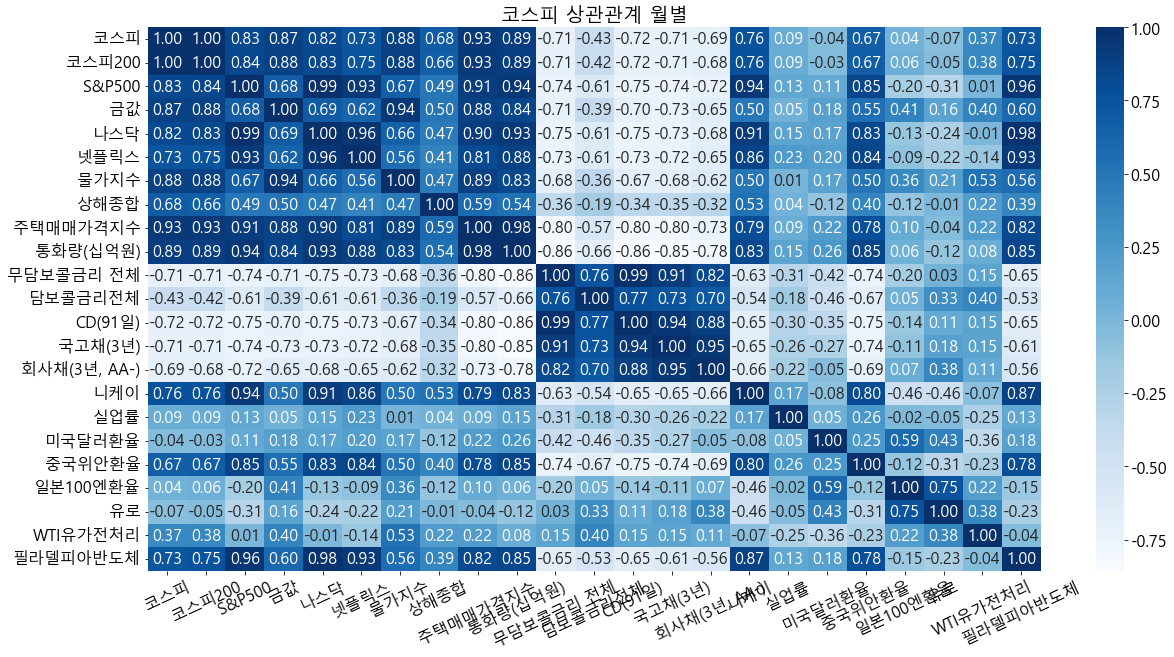

In [ ]:
# 히트맵으로 확인
sns.heatmap(data = df99 ,annot = True, fmt='.2f', cmap='Blues')
plt.title('코스피 상관관계 월별')
plt.xticks(rotation=25)
plt.savefig('data/Image/코스피상관관계월별.png')
plt.show()

In [ ]:
# merge 한 데이터 csv로 저장
df30.to_csv('./data/코스피상관관계1 월별.csv', encoding='utf-8-sig')

In [ ]:
# 학습 결과 데이터로 분리
X = df30[['일자']]
y = df30.drop('일자',axis=1)

In [ ]:
# 표준화
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(y)
X1

array([[-1.56632135, -1.57142562, -0.86481126, ..., -1.49266141,
        -1.67938176, -0.47915588],
       [-1.66387394, -1.66121781, -0.94566399, ..., -1.43446888,
        -1.61591814, -0.58605773],
       [-1.71591261, -1.71038526, -1.02743694, ..., -1.39271912,
        -1.60936705, -0.65439296],
       ...,
       [ 1.49990337,  1.53125168,  2.34000838, ..., -0.32028486,
         1.57077454,  2.46564655],
       [ 1.38116016,  1.42483003,  2.34023843, ..., -0.26378397,
         1.97939837,  2.68137858],
       [ 1.1485487 ,  1.15629403,  1.97762458, ..., -0.21959824,
         1.63341928,  2.02767438]])

In [ ]:
# 데이터 전처리
X2 = pd.DataFrame(X1)
X2.columns = y.columns

In [ ]:
# 데이터 병합 및 행렬 변환
final=pd.concat([X,X2],axis=1)
final.T

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
일자,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,2003-01-01 00:00:00,2003-02-01 00:00:00,...,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00
코스피,-1.566321,-1.663874,-1.715913,-1.784384,-1.796144,-1.896627,-1.841597,-1.802278,-1.915928,-1.98259,...,2.234609,1.998479,1.95357,1.966951,1.795762,1.536789,1.497993,1.499903,1.38116,1.148549
코스피200,-1.571426,-1.661218,-1.710385,-1.775812,-1.790784,-1.883182,-1.817988,-1.783783,-1.890102,-1.955297,...,2.218016,1.963241,1.949957,2.022903,1.83433,1.637055,1.578059,1.531252,1.42483,1.156294
S&P500,-0.864811,-0.945664,-1.027437,-1.022784,-1.128179,-1.054478,-1.001619,-1.06069,-1.085912,-1.101127,...,2.523642,2.83509,2.794957,3.003237,2.741156,2.592919,2.756695,2.340008,2.340238,1.977625
금값,-1.682886,-1.708515,-1.731602,-1.712115,-1.68924,-1.701525,-1.700678,-1.637347,-1.594773,-1.633322,...,1.346738,1.402825,1.384059,1.499877,1.432034,1.66888,1.729119,1.643314,1.51716,1.453427
나스닥,-0.84688,-0.89055,-0.935513,-0.940795,-0.962314,-0.964897,-0.917724,-0.923929,-0.92325,-0.944772,...,2.922473,2.881706,3.145701,3.049656,2.783649,2.605199,2.527498,2.462876,2.021598,1.905721
넷플릭스,-0.686256,-0.686839,-0.68641,-0.687834,-0.68809,-0.689686,-0.688947,-0.688303,-0.687953,-0.68711,...,2.827361,3.133685,3.284568,2.932764,2.21396,1.696342,1.492586,1.079186,0.417977,0.408432
물가지수,-2.000308,-2.052633,-2.075656,-2.065191,-2.048447,-2.037982,-2.021238,-2.020191,-1.958447,-1.914494,...,1.442708,1.564104,1.647824,1.645731,1.770266,1.827824,2.010963,2.208753,2.29666,2.366776
상해종합,-1.183638,-1.199823,-1.050583,-1.090022,-1.136047,-1.239816,-1.309844,-1.381281,-1.350964,-1.268584,...,1.118089,1.058374,1.018601,1.117894,1.013309,0.932534,0.733077,0.565259,0.515406,0.74552
주택매매가격지수,-1.793874,-1.777046,-1.740155,-1.673169,-1.579244,-1.55918,-1.555782,-1.549068,-1.552465,-1.532321,...,2.268402,2.350678,2.438375,2.478502,2.501154,2.5179,2.525909,2.54298,2.563286,2.571457


In [ ]:
df

,코스피,코스피200,S&P500,금값,나스닥,넷플릭스,물가지수,상해종합,주택매매가격지수,통화량(십억원),...,국고채(3년),"회사채(3년, AA-)",니케이,실업률,미국달러환율,중국위안환율,일본100엔환율,유로,WTI유가전처리,필라델피아반도체
일자,,,,,,,,,,,,,,,,,,,,,
2002-05-01,-1.566321,-1.571426,-0.864811,-1.682886,-0.84688,-0.686256,-2.000308,-1.183638,-1.793874,-1.379001,...,2.170597,1.963289,-0.683153,-0.864087,1.538047,-0.6887,-0.416544,-1.492661,-1.679382,-0.479156
2002-06-01,-1.663874,-1.661218,-0.945664,-1.708515,-0.89055,-0.686839,-2.052633,-1.199823,-1.777046,-1.367214,...,1.912621,1.771307,-0.810025,-1.264679,1.086914,-0.6887,-0.463603,-1.434469,-1.615918,-0.586058
2002-07-01,-1.715913,-1.710385,-1.027437,-1.731602,-0.935513,-0.68641,-2.075656,-1.050583,-1.740155,-1.359778,...,1.752257,1.666026,-0.914697,-1.064383,0.680694,-0.6887,-0.403608,-1.392719,-1.609367,-0.654393
2002-08-01,-1.784384,-1.775812,-1.022784,-1.712115,-0.940795,-0.687834,-2.065191,-1.090022,-1.673169,-1.355286,...,1.52217,1.443079,-1.017228,-0.663791,0.799859,-0.6887,-0.400486,-1.430544,-1.529116,-0.691393
2002-09-01,-1.796144,-1.790784,-1.128179,-1.68924,-0.962314,-0.68809,-2.048447,-1.136047,-1.579244,-1.34136,...,1.52217,1.337798,-1.084983,-1.665271,0.928345,-0.6887,-0.416544,-1.333579,-1.468928,-0.766116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,1.536789,1.637055,2.592919,1.66888,2.605199,1.696342,1.827824,0.932534,2.5179,2.223883,...,-0.628795,-0.635904,1.936485,-0.263199,0.820726,1.652161,-0.203048,-0.14564,1.203504,3.080061
2022-03-01,1.497993,1.578059,2.756695,1.729119,2.527498,1.492586,2.010963,0.733077,2.525909,2.244154,...,-0.570227,-0.539912,1.854187,-1.064383,1.061069,1.693694,-0.265831,-0.244161,1.39021,3.079458
2022-04-01,1.499903,1.531252,2.340008,1.643314,2.462876,1.079186,2.208753,0.565259,2.54298,2.248837,...,-0.17141,-0.166476,1.932529,-1.064383,1.18087,1.689479,-0.551366,-0.320285,1.570775,2.465647


In [ ]:
a=['코스피', '코스피200', 'S&P500', '금값', '나스닥', '넷플릭스', '물가지수', '상해종합',
       '주택매매가격지수', '통화량(십억원)', '무담보콜금리 전체', '담보콜금리전체', 'CD(91일)', '국고채(3년)',
       '회사채(3년, AA-)', '니케이', '실업률', '미국달러환율', '중국위안환율', '일본100엔환율', '유로',
       'WTI유가전처리', '필라델피아반도체']

In [ ]:
df.reset_index(inplace=True)

In [ ]:
a = ['코스피200', 'S&P500', '금값', '나스닥', '넷플릭스', '물가지수', '상해종합',
       '주택매매가격지수', '통화량(십억원)', '무담보콜금리 전체', '담보콜금리전체', 'CD(91일)', '국고채(3년)',
       '회사채(3년, AA-)', '니케이', '실업률', '미국달러환율', '중국위안환율', '일본100엔환율', '유로',
       'WTI유가전처리', '필라델피아반도체']

In [ ]:
df32 = df30[['일자','코스피', '코스피200', 'S&P500', '금값', '나스닥', '물가지수', '주택매매가격지수', 'WTI유가전처리', '필라델피아반도체']]
df32

,일자,코스피,코스피200,S&P500,금값,나스닥,물가지수,주택매매가격지수,WTI유가전처리,필라델피아반도체
0,2002-05-01,844.778182,105.976818,1067.14,326.55,1660.310913,78.37,46.910,25.31,476.3
1,2002-06-01,785.747222,98.738333,989.82,314.45,1505.488489,77.87,47.118,26.86,387.6
2,2002-07-01,754.257619,94.774762,911.62,303.55,1346.085455,77.65,47.574,27.02,330.9
3,2002-08-01,712.824286,89.500476,916.07,312.75,1327.360463,77.75,48.402,28.98,300.2
4,2002-09-01,705.708000,88.293500,815.28,323.55,1251.069006,77.91,49.563,30.45,238.2
...,...,...,...,...,...,...,...,...,...,...
237,2022-02-01,2722.530000,364.624444,4373.79,1908.99,13898.728413,114.95,100.207,95.72,3429.5
238,2022-03-01,2699.054286,359.868571,4530.41,1937.43,13623.262950,116.70,100.306,100.28,3429.0
239,2022-04-01,2700.210000,356.095238,4131.93,1896.92,13394.163037,118.59,100.517,104.69,2919.7
240,2022-05-01,2628.356190,347.516190,4132.15,1837.36,11829.729539,119.43,100.768,114.67,3098.7


In [ ]:
df32.to_csv('./data/상관관계3 월별.csv', encoding='utf-8-sig')

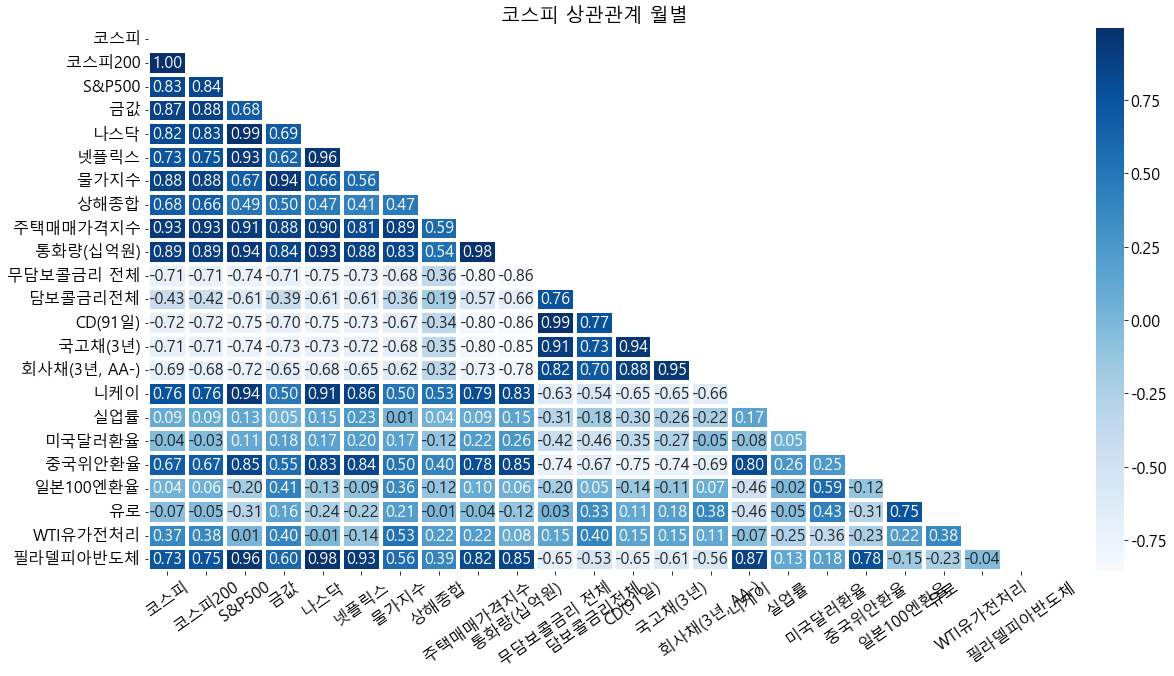

In [ ]:
# 히트맵 그리기
mask = np.zeros_like(df99, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize = (15,7))
# sns.heatmap(df2, mask = mask, annot=True, annot_kws=dict(color='r'), linewidths=.5, cmap='Blues')
sns.heatmap(df99, mask = mask, annot=True, linewidths=4, fmt='.2f', cmap='Blues')
plt.xticks(rotation=35)
plt.title('코스피 상관관계 월별')
plt.savefig('data/Image/상관관계 월별반.png')
plt.show()

In [ ]:
a = ['코스피', '코스피200', 'S&P500', '금값', '나스닥', '물가지수', '주택매매가격지수', 'WTI유가전처리', '필라델피아반도체']

In [ ]:
df


,일자,코스피,코스피200,S&P500,금값,나스닥,넷플릭스,물가지수,상해종합,주택매매가격지수,...,국고채(3년),"회사채(3년, AA-)",니케이,실업률,미국달러환율,중국위안환율,일본100엔환율,유로,WTI유가전처리,필라델피아반도체
0,2002-05-01,-1.566321,-1.571426,-0.864811,-1.682886,-0.84688,-0.686256,-2.000308,-1.183638,-1.793874,...,2.170597,1.963289,-0.683153,-0.864087,1.538047,-0.6887,-0.416544,-1.492661,-1.679382,-0.479156
1,2002-06-01,-1.663874,-1.661218,-0.945664,-1.708515,-0.89055,-0.686839,-2.052633,-1.199823,-1.777046,...,1.912621,1.771307,-0.810025,-1.264679,1.086914,-0.6887,-0.463603,-1.434469,-1.615918,-0.586058
2,2002-07-01,-1.715913,-1.710385,-1.027437,-1.731602,-0.935513,-0.68641,-2.075656,-1.050583,-1.740155,...,1.752257,1.666026,-0.914697,-1.064383,0.680694,-0.6887,-0.403608,-1.392719,-1.609367,-0.654393
3,2002-08-01,-1.784384,-1.775812,-1.022784,-1.712115,-0.940795,-0.687834,-2.065191,-1.090022,-1.673169,...,1.52217,1.443079,-1.017228,-0.663791,0.799859,-0.6887,-0.400486,-1.430544,-1.529116,-0.691393
4,2002-09-01,-1.796144,-1.790784,-1.128179,-1.68924,-0.962314,-0.68809,-2.048447,-1.136047,-1.579244,...,1.52217,1.337798,-1.084983,-1.665271,0.928345,-0.6887,-0.416544,-1.333579,-1.468928,-0.766116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-02-01,1.536789,1.637055,2.592919,1.66888,2.605199,1.696342,1.827824,0.932534,2.5179,...,-0.628795,-0.635904,1.936485,-0.263199,0.820726,1.652161,-0.203048,-0.14564,1.203504,3.080061
238,2022-03-01,1.497993,1.578059,2.756695,1.729119,2.527498,1.492586,2.010963,0.733077,2.525909,...,-0.570227,-0.539912,1.854187,-1.064383,1.061069,1.693694,-0.265831,-0.244161,1.39021,3.079458
239,2022-04-01,1.499903,1.531252,2.340008,1.643314,2.462876,1.079186,2.208753,0.565259,2.54298,...,-0.17141,-0.166476,1.932529,-1.064383,1.18087,1.689479,-0.551366,-0.320285,1.570775,2.465647
240,2022-05-01,1.38116,1.42483,2.340238,1.51716,2.021598,0.417977,2.29666,0.515406,2.563286,...,-0.117026,-0.077297,1.866075,-1.064383,1.578511,1.651789,-0.506147,-0.263784,1.979398,2.681379


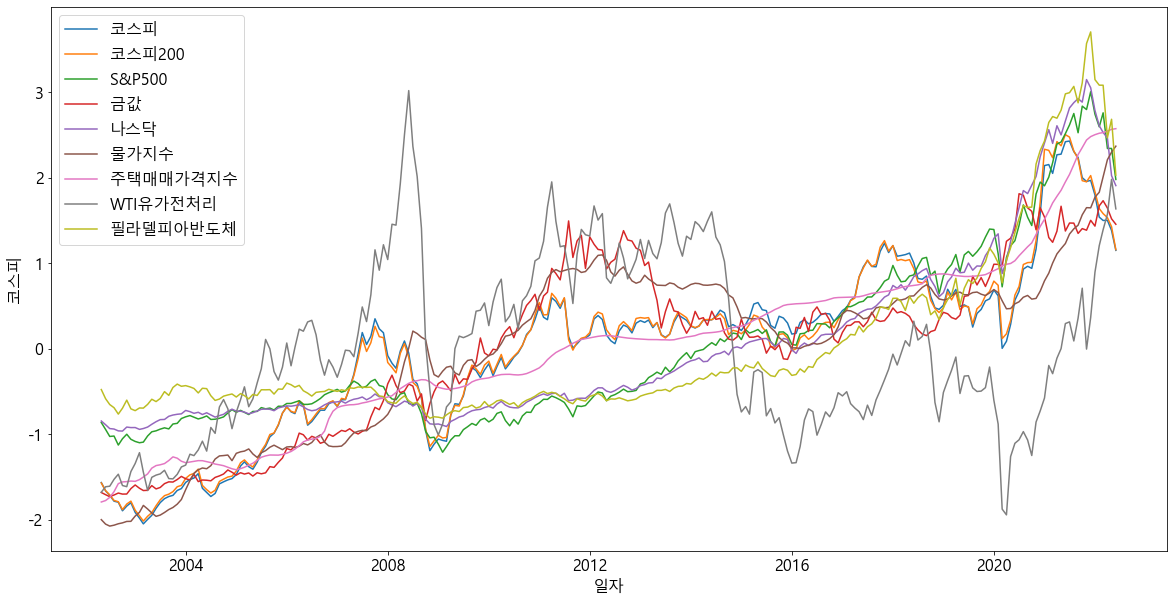

In [ ]:
# 그래프 그리기
for idx in a :
#     sns.lineplot(data=df, x='일자', y='코스피',label='코스피')
    sns.lineplot(data=df, x='일자', y=idx,label=idx)
#     plt.savefig(f'./data/{idx}.png')
#     plt.show()
plt.savefig(f'./data/코스피종합.png')
plt.show()


In [ ]:
df80 = pd.merge(df1, df18, how='inner', on='일자')
df80

,일자,코스피,WTI유가전처리
0,1983-04-01,125.222400,30.63
1,1983-05-01,128.040000,30.25
2,1983-06-01,123.908800,31.38
3,1983-07-01,122.865769,32.00
4,1983-08-01,122.078077,31.59
...,...,...,...
468,2022-04-01,2700.210000,104.69
469,2022-05-01,2628.356190,114.67
470,2022-06-01,2487.598500,106.22
471,2022-07-01,2363.606190,98.62


In [ ]:
df81 = df80.corr()
df81

,코스피,WTI유가전처리
코스피,1.000000,0.733664
WTI유가전처리,0.733664,1.000000


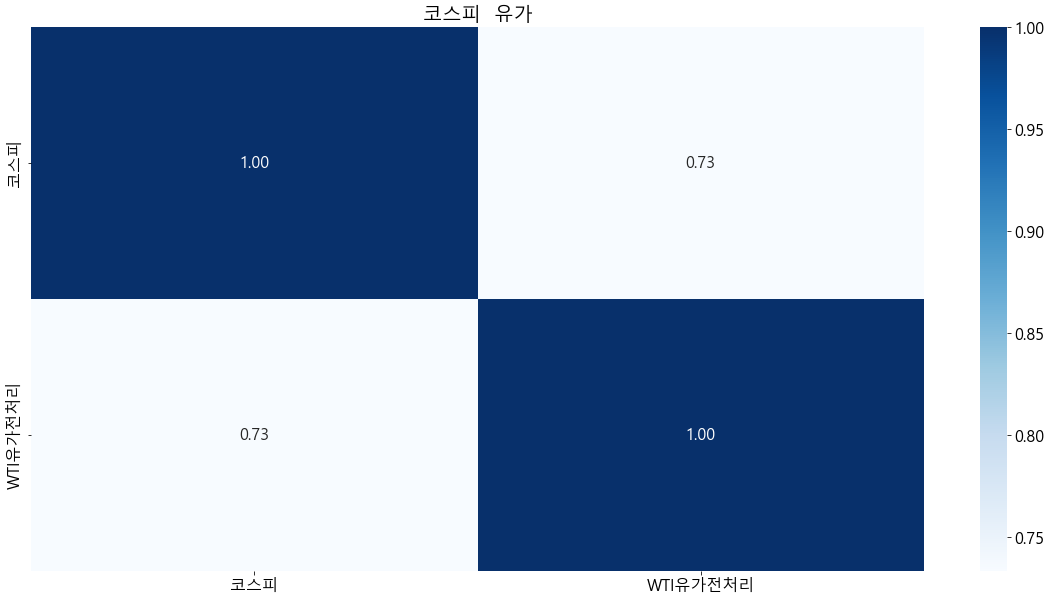

In [ ]:
# 유가 히트맵 그리기
sns.heatmap(data = df81 ,annot = True, fmt='.2f', cmap='Blues')
plt.title('코스피  유가')
# plt.xticks(rotation=35)
plt.savefig('data/Image/코스피유가.png')
plt.show()

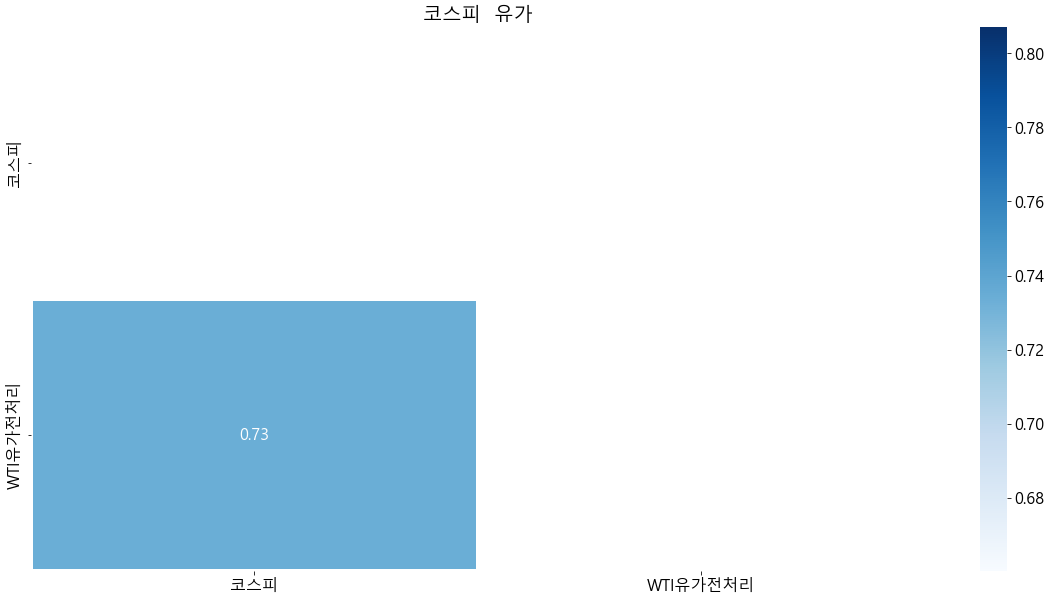

In [ ]:
# 유가 히트맵 그리기
mask = np.zeros_like(df81, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize = (15,7))
# sns.heatmap(df2, mask = mask, annot=True, annot_kws=dict(color='r'), linewidths=.5, cmap='Blues')
sns.heatmap(df81, mask = mask, annot=True, linewidths=4, fmt='.2f', cmap='Blues')
# plt.xticks(rotation=35)
plt.title('코스피  유가')
plt.savefig('data/Image/코스피유가반.png')
plt.show()

In [ ]:
df82 = pd.merge(df1, df19, how='inner', on='일자')
df82

,일자,코스피,필라델피아반도체
0,1994-06-01,926.692800,119.5
1,1994-07-01,944.658846,122.4
2,1994-08-01,938.923077,134.9
3,1994-09-01,1002.398696,128.8
4,1994-10-01,1085.644800,141.8
...,...,...,...
334,2022-04-01,2700.210000,2919.7
335,2022-05-01,2628.356190,3098.7
336,2022-06-01,2487.598500,2556.3
337,2022-07-01,2363.606190,2967.1


In [ ]:
df84 = df82.corr()
df84

,코스피,필라델피아반도체
코스피,1.000000,0.685117
필라델피아반도체,0.685117,1.000000


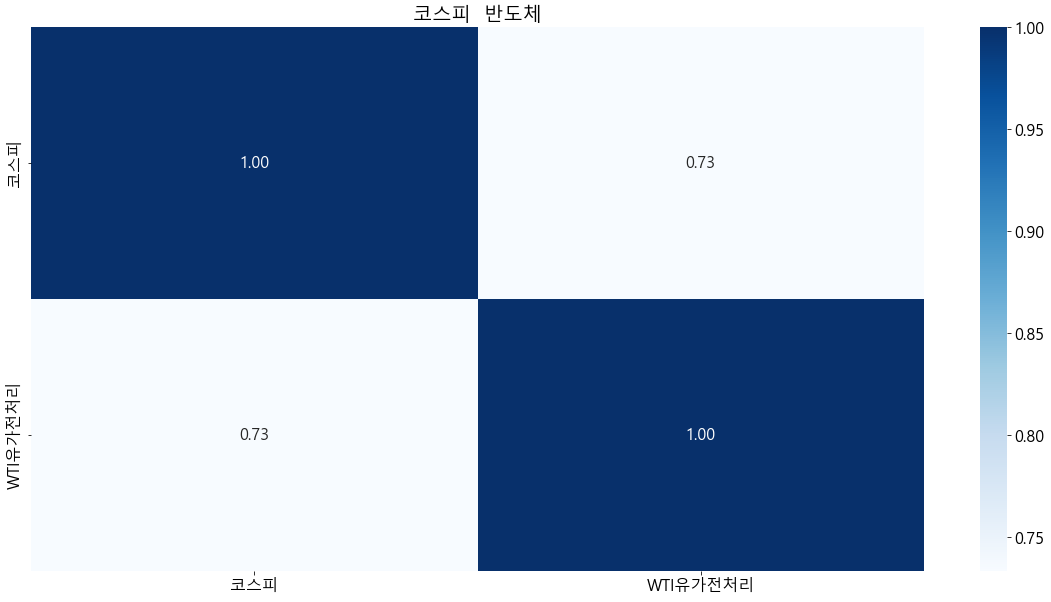

In [ ]:
# 반도체 히트맵 그리기
sns.heatmap(data = df81 ,annot = True, fmt='.2f', cmap='Blues')
plt.title('코스피  반도체')
# plt.xticks(rotation=35)
plt.savefig('data/Image/코스피반도체.png')
plt.show()

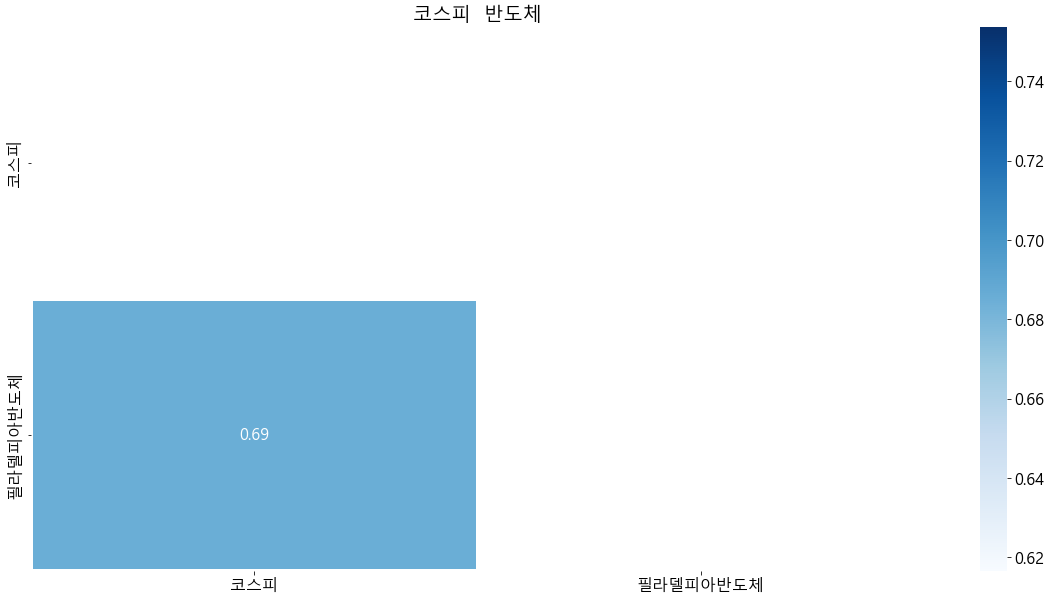

In [ ]:
# 반도체 히트맵 그리기
mask = np.zeros_like(df84, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize = (15,7))
# sns.heatmap(df2, mask = mask, annot=True, annot_kws=dict(color='r'), linewidths=.5, cmap='Blues')
sns.heatmap(df84, mask = mask, annot=True, linewidths=4, fmt='.2f', cmap='Blues')
# plt.xticks(rotation=35)
plt.title('코스피  반도체')
plt.savefig('data/Image/코스피반도체반.png')
plt.show()